In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import log

In [8]:
temp = 28
ph = 7.6
th = 1000
tac = 20

# Calcul de la balance de Taylor

La balance de Taylor calcule le bon pH en fonction du TH et du TAC.
Le pH d'équilibre est proportionnel à la moyenne de logarithmes des TH et TAC

On a comme valeurs de référence à température 24°C :
* TH = TAC = 60, pHé = 8,4
* TH = TAC = 300, pHé = 7
* TH = 60, TAC = 300, pHé = 7,7

8.42
7.05
7.74


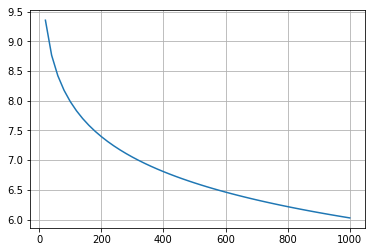

In [9]:
# 1ère estimation, paramètres en ppm
def taylor1(th, tac):
    moy = (log(th)+log(tac))/2
    return -0.85*moy+11.9

print('{:.2f}'.format(taylor1(60, 60)))
print('{:.2f}'.format(taylor1(300, 300)))
print('{:.2f}'.format(taylor1(60, 300)))

#print(plt.style.available)

x = np.linspace(20, 1000)
y = [taylor1(a,a) for a in x]
plt.grid(True)
plt.plot(x, y)

Pour affiner les paramètres, on va utiliser le log des valeurs de références :
* log(TH) = log(TAC) = 1.79, pHé = 8,4
* log(TH) = log(TAC) = 3.40, pHé = 7

Et là ça devient linéaire !

La pente entre 6.91 et 3 est de 8,4-7=1,4

In [10]:
'Pente de {0:.2f} sur un intervalle de {1:.2f}, donc une pente de {2:.2f}'.format(
    7-8.4, log(300)-log(60), (7-8.4)/(log(300)-log(60)))

'Pente de -1.40 sur un intervalle de 1.61, donc une pente de -0.87'

8.40
7.00
7.70


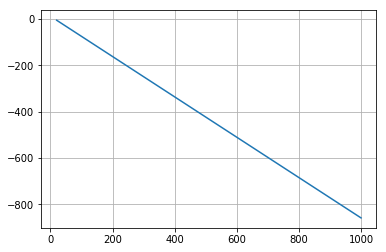

In [11]:
def taylor2(lth, ltac):
    moy = (lth+ltac)/2
    return -0.87*moy+11.96

print('{:.2f}'.format(taylor2(log(60), log(60))))
print('{:.2f}'.format(taylor2(log(300), log(300))))
print('{:.2f}'.format(taylor2(log(60), log(300))))

x = np.linspace(20, 1000)
y = [taylor2(a,a) for a in x]
plt.grid(True)
plt.plot(x, y)

In [12]:
def taylor(th, tac):
    moy = (log(th)+log(tac))/2
    return -0.87*moy+11.96

phe = taylor(th, tac)
print('pH à l\'équilibre:{:.1f}, pH actuel:{:.1f}'.format(phe, ph))

def eau_eq(ph, phe):
    marge = 0.2
    if(ph > phe and ph-phe > marge):
        print('Eau entartrante', ph-phe)
    elif(phe > ph and phe-ph > marge):
        print('Eau aggressive', phe-ph)
    else:
        print('Eau équilibrée')
        
eau_eq(ph, phe)

pH à l'équilibre:7.7, pH actuel:7.6
Eau équilibrée


## Correction avec la température

Les valeurs sont données pour une piscine à 24°C.
Pour une picine à 4°C, on doit ajouter 0.4 au pH.

En l'abscence de plus de détails, on considèrera que c'est une relation linéaire.
On a donc une augmentation de 0.02 par degré °C en moins, et inversement.

In [13]:
def taylor_temp(th, tac, temp):
    ref = taylor(th, tac)
    return ref + (24-temp)*0.02

'TH=TAC=300, à 24° pH={0:.1f}, à 4° pH={1:.1f}'.format(taylor_temp(300, 300, 24), taylor_temp(300, 300, 4))

'TH=TAC=300, à 24° pH=7.0, à 4° pH=7.4'

In [14]:
'{:.1f}'.format(taylor_temp(th, tac, temp))

'7.6'

In [15]:
phe = taylor_temp(th, tac, temp)        
eau_eq(ph, phe)

Eau équilibrée


# L'indice de Langelier

In [16]:
def langelier_temp(temp):
    if(temp <= 12): return 0.3
    if(temp <= 16): return 0.4
    if(temp <= 19): return 0.5
    if(temp <= 24): return 0.6
    if(temp <= 29): return 0.7
    if(temp <= 34): return 0.8
    if(temp <= 41): return 0.9
    return 1.0

In [17]:
def langelier_th(th):
    if(th <= 25): return 1.0
    if(th <= 50): return 1.3
    if(th <= 75): return 1.5
    if(th <= 100): return 1.6
    if(th <= 150): return 1.8
    if(th <= 200): return 1.9
    if(th <= 300): return 2.1
    if(th <= 400): return 2.2
    if(th <= 800): return 2.5
    return 2.6

In [18]:
def langelier_tac(tac):
    return langelier_th(tac)+0.4

In [19]:
def langelier(th, tac, ph, temp):
    #print(ph, langelier_temp(temp), langelier_th(th), langelier_tac(tac))
    return ph + langelier_temp(temp) + langelier_th(th) + langelier_tac(tac) - 12.1

In [20]:
'{:.1f}'.format(langelier(120, 170, 7.4, 23))

'0.0'

In [21]:
eau_eq(ph, ph+langelier(120, 170, 7.4, 23))

Eau équilibrée


# Bilan complet

In [ ]:
temp = 28
ph = 8.4
th = 1000
tac = 240

In [ ]:
print('Equilibre par balance de Taylor')
phe = taylor_temp(th, tac, temp)        
eau_eq(ph, phe)

In [ ]:
print('Equilibre par indice de Langelier {:0.1f}'.format(langelier(th, tac, ph, temp)))
eau_eq(ph, ph-langelier(th, tac, ph, temp))

In [ ]:
diag = th*tac/100
print('Diagnostique rapide TH x TAC', diag)
if(diag < 200): print('Eau aggressive')
elif(diag > 600): print('Eau entartrante')
else: print('Eau équilibrée')

In [ ]:
x = np.linspace(5, 35)
plt.plot(x, langelier(th, tac, x, temp))